In [5]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in d:\users\hp\anaconda3\lib\site-packages (2.2.2)



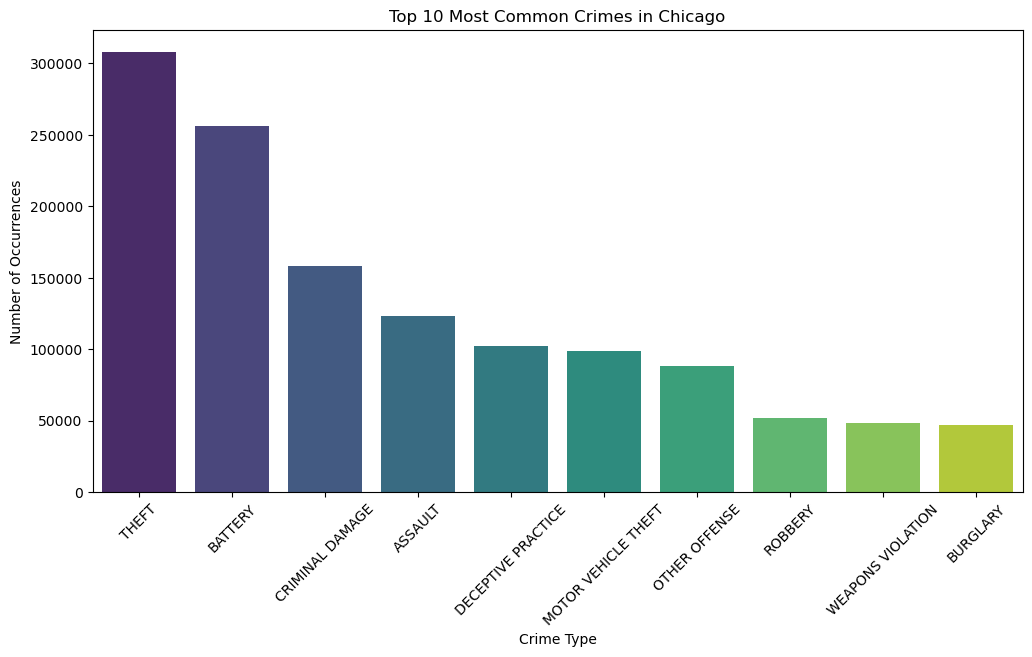

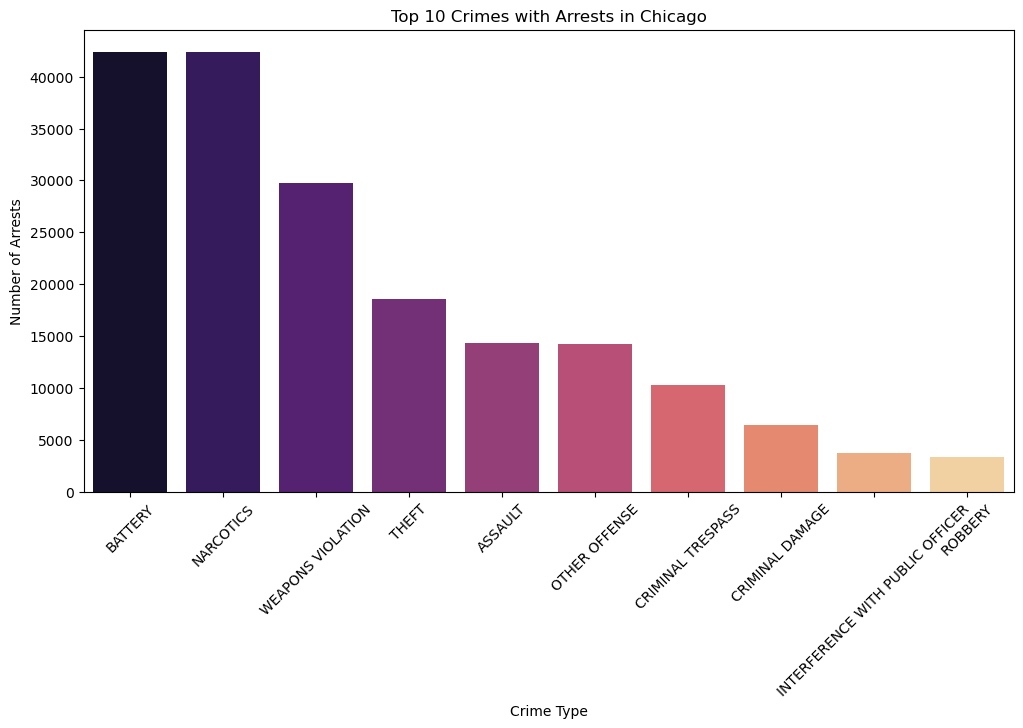

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset 
file_path = r"C:\Users\HP\Desktop\chicago-crime-data_excel.csv"
data = pd.read_csv(file_path)

# Checking for columns that could represent crime type and severity
# Aggregating data by primary crime type
crime_counts = data['primary_type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=crime_counts.head(10).index, y=crime_counts.head(10).values, palette='viridis')
plt.title('Top 10 Most Common Crimes in Chicago')
plt.xlabel('Crime Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

# Further analysis: Plotting arrests related to different crime types
arrest_counts = data[data['arrest'] == True]['primary_type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=arrest_counts.head(10).index, y=arrest_counts.head(10).values, palette='magma')
plt.title('Top 10 Crimes with Arrests in Chicago')
plt.xlabel('Crime Type')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.show()


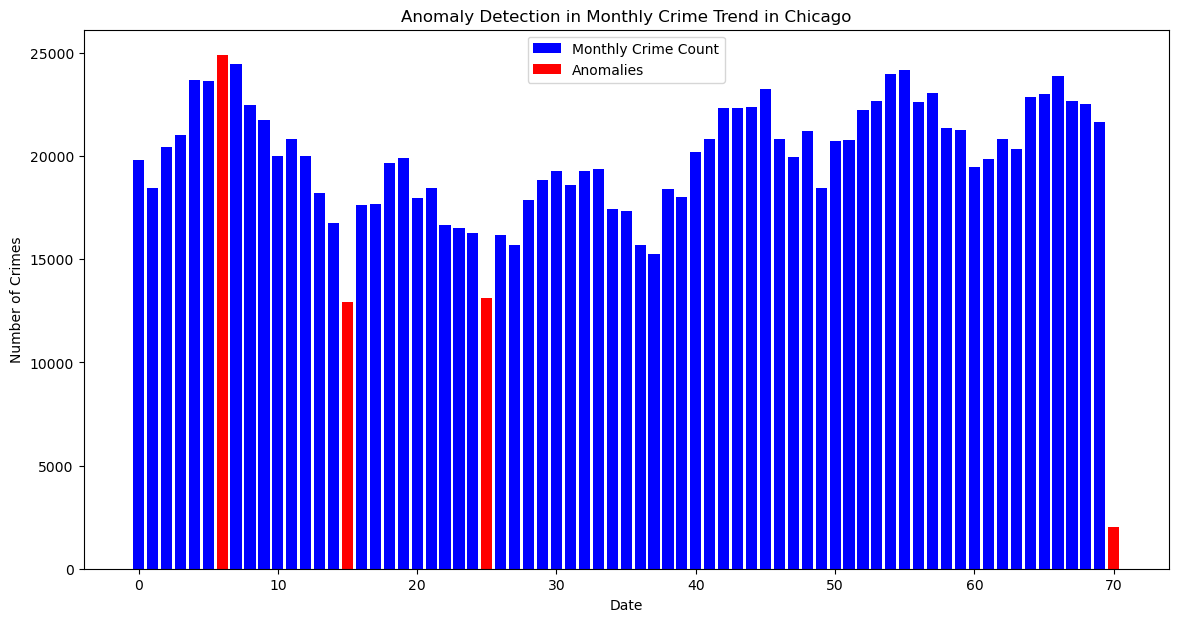

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Load the dataset (adjust file path as needed)
file_path = r"C:\Users\HP\Desktop\chicago-crime-data_excel.csv"
data = pd.read_csv(file_path)

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set 'date' as the index and sort by date
data.set_index('date', inplace=True)
data.sort_index(inplace=True)

# Resample the data by month-end (ME) and count the number of crimes per month
monthly_crime_counts = data.resample('ME').size()

# Reshape data for anomaly detection
monthly_crime_counts = monthly_crime_counts.values.reshape(-1, 1)

# Apply Isolation Forest to detect anomalies
model = IsolationForest(contamination=0.05)  # Assuming 5% of the data is anomalous
anomalies = model.fit_predict(monthly_crime_counts)

# Convert -1 (anomaly) and 1 (normal) into a DataFrame for easy plotting
monthly_crime_counts_df = pd.DataFrame(monthly_crime_counts, columns=['Crime Count'])
monthly_crime_counts_df['Anomaly'] = anomalies

# Plot the anomalies using bar chart
plt.figure(figsize=(14, 7))
plt.bar(monthly_crime_counts_df.index, monthly_crime_counts_df['Crime Count'], color='blue', label='Monthly Crime Count')

# Highlight anomalies in red
plt.bar(monthly_crime_counts_df.index[monthly_crime_counts_df['Anomaly'] == -1], 
        monthly_crime_counts_df['Crime Count'][monthly_crime_counts_df['Anomaly'] == -1], 
        color='red', label='Anomalies')

# Add titles and labels
plt.title('Anomaly Detection in Monthly Crime Trend in Chicago')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()

# Show the plot
plt.show()

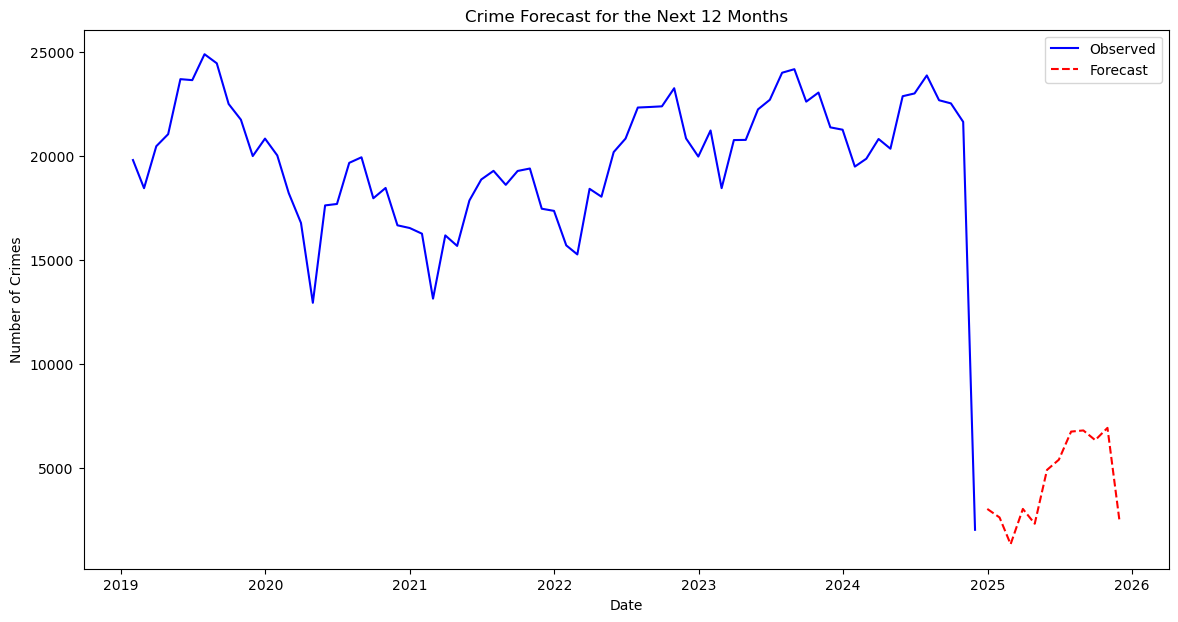

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset (adjust file path as needed)
file_path = r"C:\Users\HP\Desktop\chicago-crime-data_excel.csv"
data = pd.read_csv(file_path)

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set 'date' as the index and sort by date
data.set_index('date', inplace=True)
data.sort_index(inplace=True)

# Resample the data by month-end (ME) and count the number of crimes per month
monthly_crime_counts = data.resample('ME').size()

# Time series forecasting using Holt-Winters Exponential Smoothing
model = ExponentialSmoothing(monthly_crime_counts, seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the observed and forecasted crime counts
plt.figure(figsize=(14, 7))
plt.plot(monthly_crime_counts, label='Observed', color='blue')
plt.plot(forecast, label='Forecast', color='red', linestyle='dashed')
plt.title('Crime Forecast for the Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()

In [8]:
!pip install umap-learn

In [10]:
import umap
print(umap.__version__)  # Check if it prints the version number

0.5.7


Columns in dataset: Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')


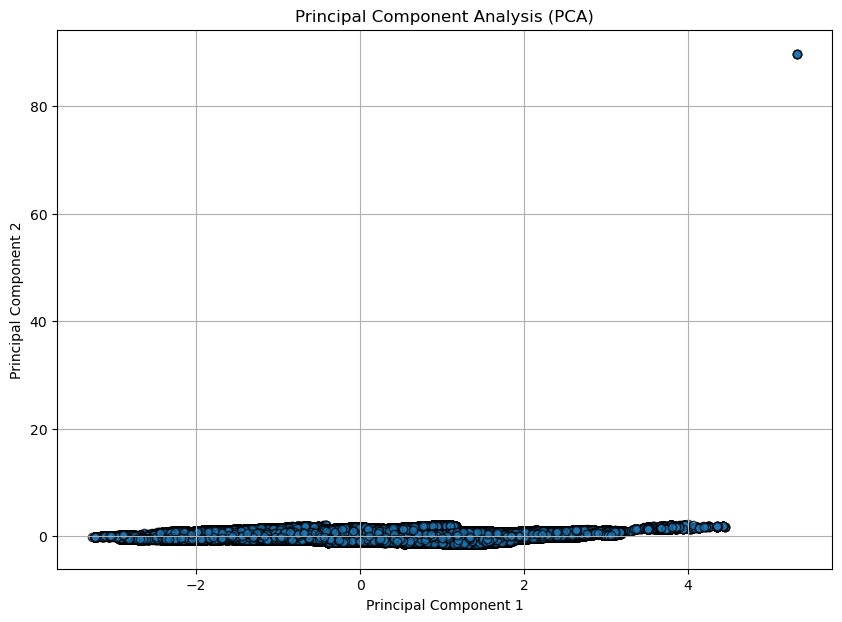

Explained Variance Ratio: [0.75856773 0.24143227]


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = r"C:\Users\HP\Desktop\chicago-crime-data_excel.csv"
data = pd.read_csv(file_path)

# Inspect columns
print("Columns in dataset:", data.columns)

# Adjust feature columns based on available data
feature_columns = ['latitude', 'longitude']  # Adjust this list based on actual column names

# Ensure the columns exist
missing_columns = [col for col in feature_columns if col not in data.columns]
if missing_columns:
    raise KeyError(f"Missing columns in dataset: {missing_columns}")

# Drop rows with missing values in selected columns
numerical_data = data[feature_columns].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Plot the principal components
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolor='k')
plt.title('Principal Component Analysis (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance}')
